## 0. imports

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

jak sie nazywa 3. etap?
trzba by było zmienić nazwę pliku i folderu

## 1. wczytanie danych

In [33]:
import pandas as pd
data_pca = pd.read_csv('../data/our_data_pca.csv')
data = pd.read_csv('../data/our_data.csv')

## 2. Model `kmeans`  
dla dwóch klastrów (jak wynika z poprzedniego etapu)

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca)
data['cluster'] = kmeans.labels_

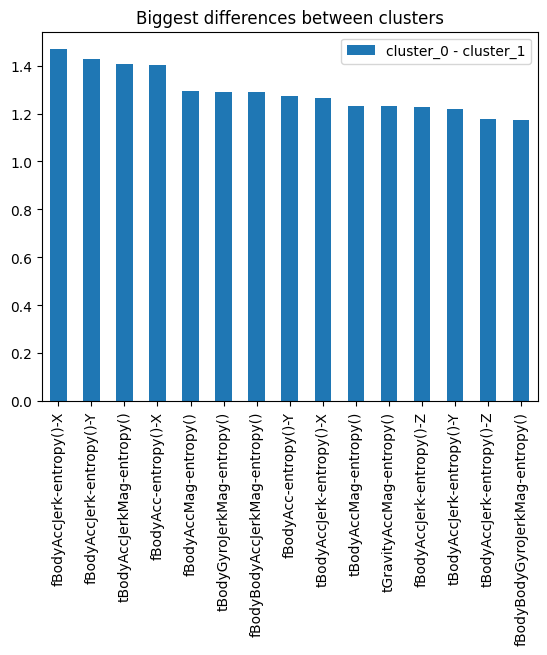

/var/folders/yx/857vdk_j67j9v688jjd81j8c0000gn/T/ipykernel_39002/3717836785.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdata['cluster'] = data['cluster']
/var/folders/yx/857vdk_j67j9v688jjd81j8c0000gn/T/ipykernel_39002/3717836785.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


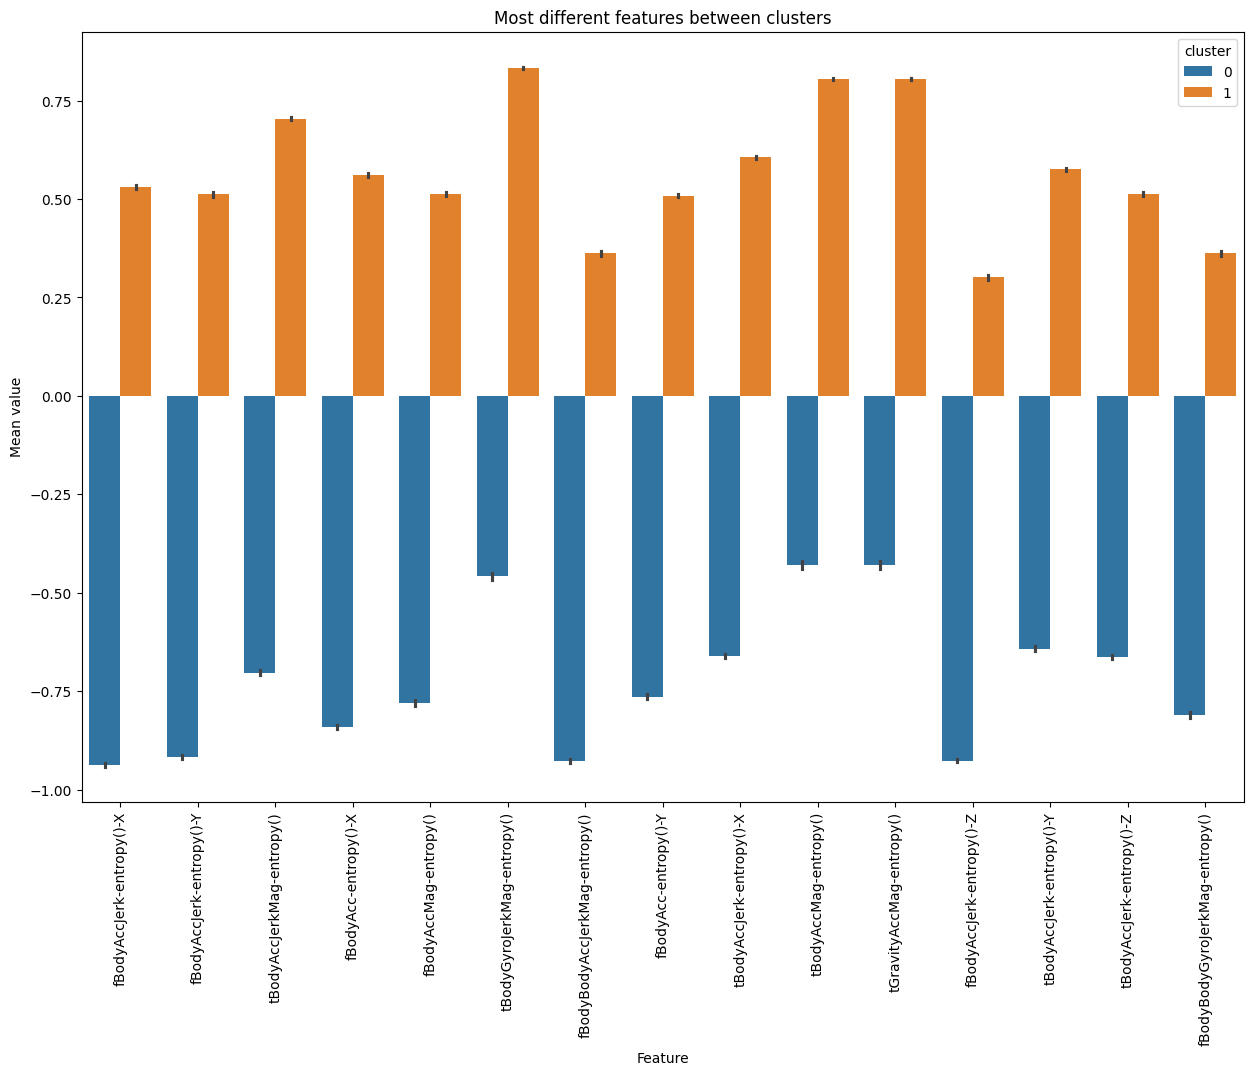

In [36]:
cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

#differences between clusters
difference = abs(cluster_0.mean() - cluster_1.mean())
difference = difference.sort_values(ascending=False)
difference = pd.DataFrame(difference)
difference.columns = ['cluster_0 - cluster_1']
first_15 = difference.head(15)

first_15.plot(kind='bar')
plt.title('Biggest differences between clusters')
plt.show()

plotdata = data[first_15.index]
plotdata['cluster'] = data['cluster']
plotdata = pd.melt(plotdata, id_vars='cluster')

sns.barplot(x='variable', y='value', hue='cluster', data=plotdata)
plt.xticks(rotation=90)
plt.title('Most different features between clusters')
plt.ylabel('Mean value')
plt.xlabel('Feature')
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.show()



jerk - maksymalna różnica w prędkości po zadanej osi w punkcie.
acc - przyspieszenie
nasz model głównie po tym rozróznia, zapewne czynności wolne, statyczne vs. dynamiczne